# MIS 492 - Data Analysis and Visualization
## Week 7

## Multivariate Visualization

### Dr. Mohammad AlMarzouq

# Multivariate Visualization
- Used to compare univariate distributions between groups
- Used to find relations between 2 variables
- Used to see how a relationship changes between 2 variables across groups

# Plots
- Best at representing two variables on the X and Y axes
- Three variables possible with 3D plots but should be avoided if possible.
- Third variable usually represented as color, shape, or another plot
    - Most suitable for comparison of relationship or distributions across groups

In [82]:
# Setup the libraries
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set(color_codes=True)


# lets load the data again
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv")
cars_df = pd.read_json("https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json")

# Plotting Two Variables
- Both matplot and seaborn could be used
- Scatter plot typically used
- Can help detect relations
    - Time searies plots are a special form of these plots showing relationship to time
    - line plots possible with time series

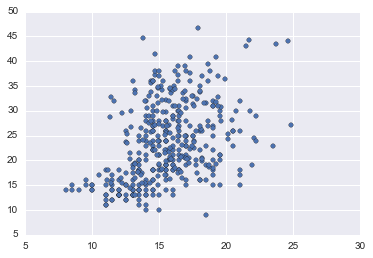

In [5]:
# Scatter plot for Acceleration X Miles per gallon
plt.scatter(cars_df.Acceleration, cars_df.Miles_per_Gallon)

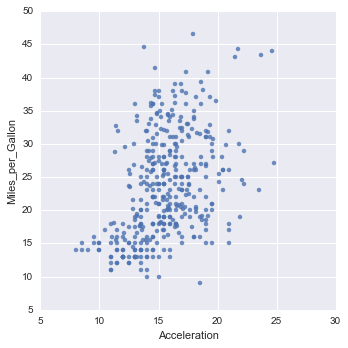

In [17]:
# Scatter plot with Seaborn
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', data=cars_df, fit_reg=False)

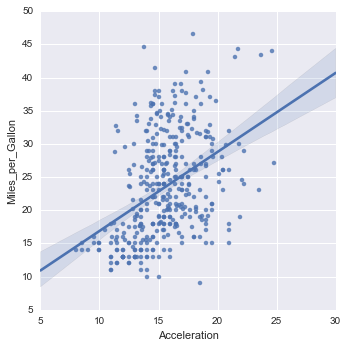

In [18]:
# Seaborn can also fit a regression line to show the direction of the relation
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', data=cars_df)

# Plotting Three or More Variables
- This typically means we are comparing subgroups in our data
- You can use colors (hue) to represent different groups
- You can also plot different groups in different plot side by side
    - Organized in rows, or columns
- The groups are typically categorical variables
    - Consider Subdividing continuous variables if you want to use as groups

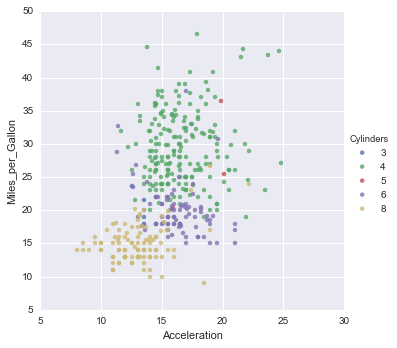

In [19]:
# Plotting 3 variables, using jue
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', hue='Cylinders',data=cars_df, fit_reg=False)

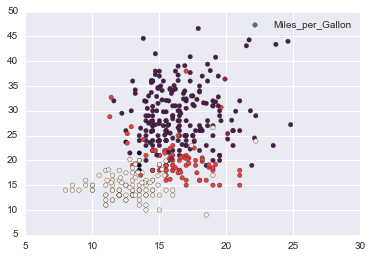

In [69]:
# Possible on matplotlib as well
# Showing legend properly is not easy
plt.scatter(cars_df.Acceleration, cars_df.Miles_per_Gallon, c=cars_df.Cylinders)
plt.legend()

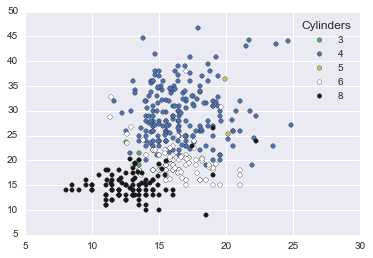

In [67]:
# Same thing with matplotlib
# Notice the legend is missing
colors = {
    2:'r',
    3:'g',
    4:'b',
    5:'y',
    6:'w',
    8:'k',
}
# We draw each cylinder plot separatly
for x in sorted(set(cars_df.Cylinders)):
    d = cars_df[cars_df.Cylinders == x]
    plt.scatter(d.Acceleration, d.Miles_per_Gallon, c=colors.get(x), label=x)
plt.legend(title="Cylinders")

# Tip
Use seaborn whenever possible

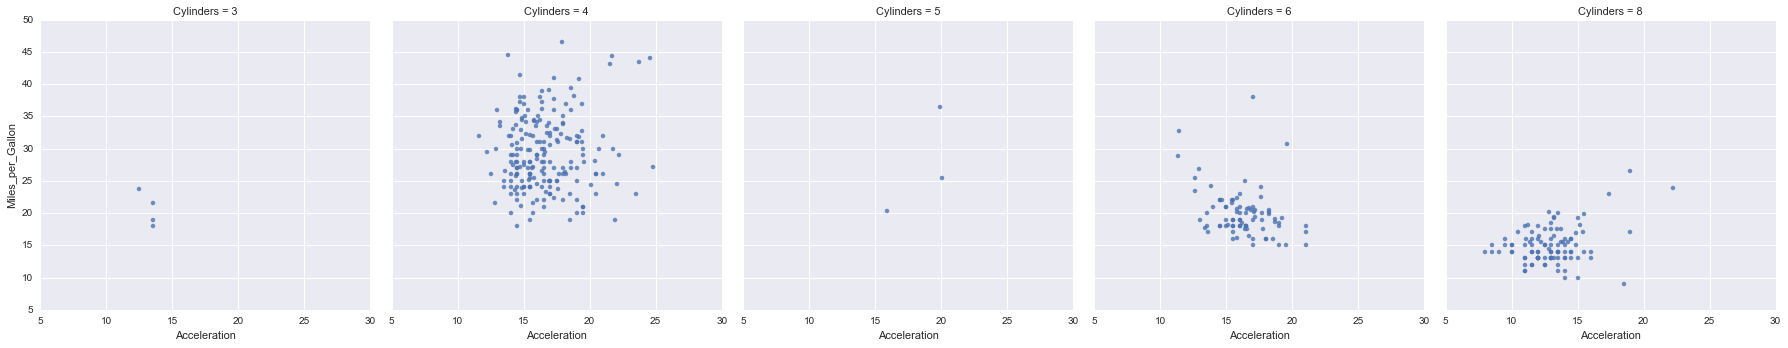

In [72]:
# See what happens when I replace hue with col
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', col='Cylinders',data=cars_df, fit_reg=False)

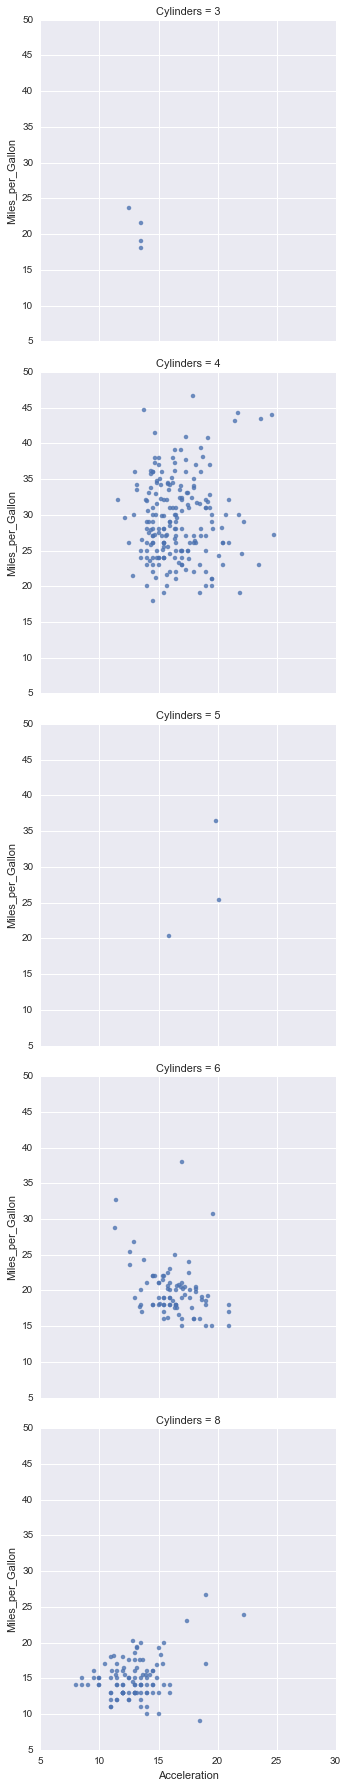

In [73]:
# now row
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', row='Cylinders',data=cars_df, fit_reg=False)

# Using row/col In Seaborn Plots
- Avoid using it with variables that have many values
    - Will create many plots
    - Difficult to compare
- Use when variable has few values

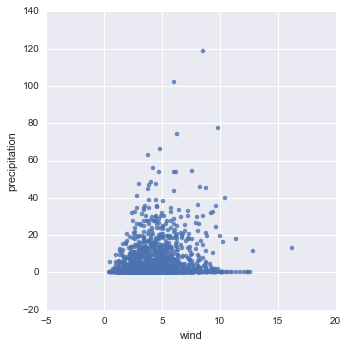

In [119]:
# Let's examine relationship between wind and percipitation
g = sns.lmplot(x='wind', y='precipitation', data=weather_df, fit_reg=False)

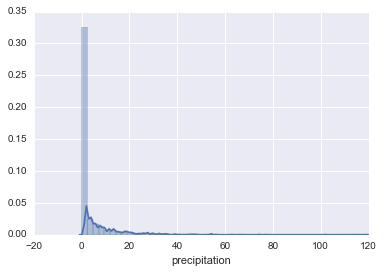

In [120]:
# Distribution of percipitation
sns.distplot(weather_df.precipitation)

# The values are bunched up close to zero

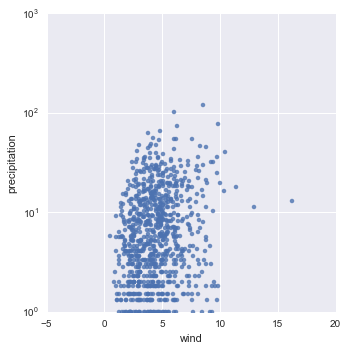

In [121]:
# Using log scale on the y access will make the plot clearer
g = sns.lmplot(x='wind', y='precipitation', data=weather_df, fit_reg=False)
g.set(yscale="log")

# No clear relationship

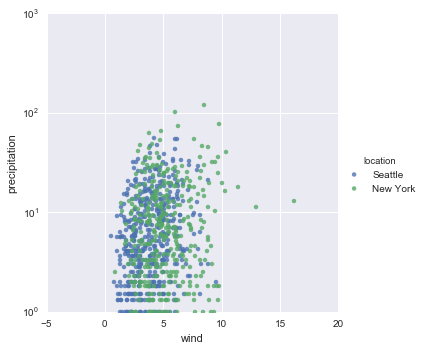

In [123]:
# Let's see if it is the same in all locations
g = sns.lmplot(x='wind', y='precipitation', hue='location', data=weather_df, fit_reg=False)
g.set(yscale="log")

# Hue not making comparison easy

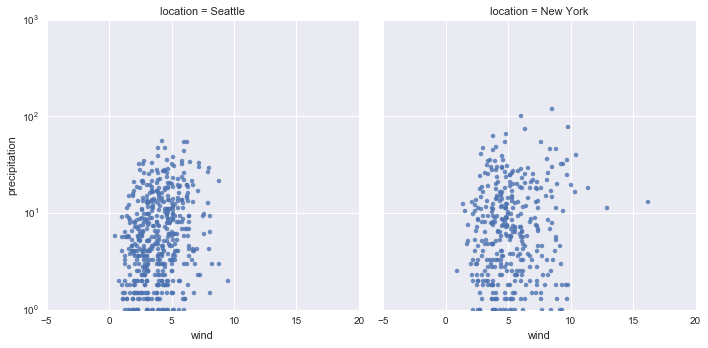

In [124]:
# two plots are better for comparison
g = sns.lmplot(x='wind', y='precipitation', col='location', data=weather_df, fit_reg=False)
g.set(yscale="log")

# Still no clear relation

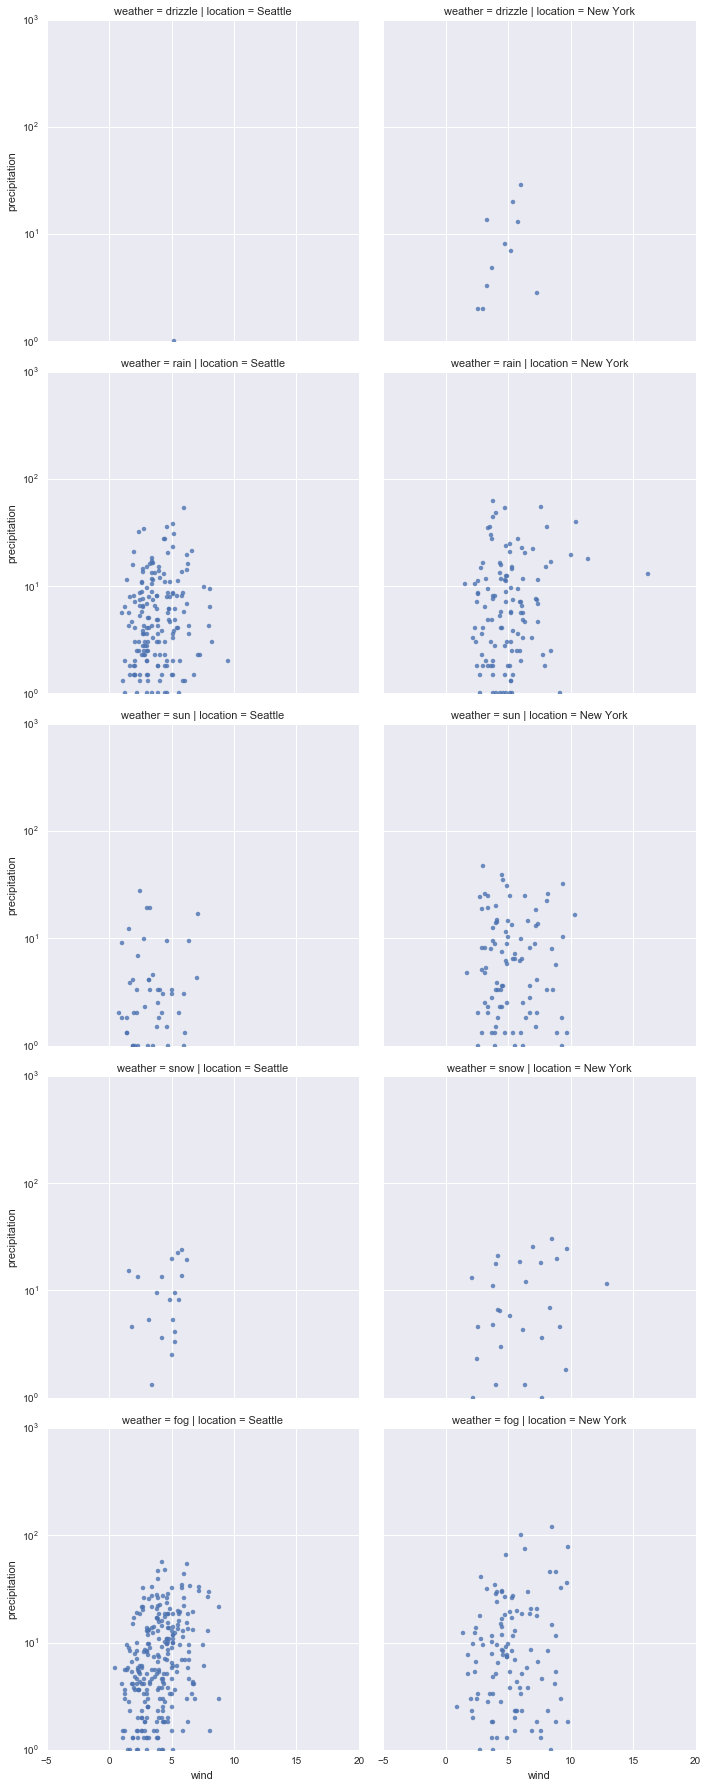

In [125]:
# Let's also break it based on weather types
g = sns.lmplot(x='wind', y='precipitation', col='location', row='weather', data=weather_df, fit_reg=False)
g.set(yscale="log")

# EDA
- Remember it is an investigation
- Sometimes our investigation takes as to a dead end
- We think of different ways to break our data
- Possibly rescale our axes, like the log scale
- Think about missing data that we might get
- There might be nothing interesting in the relationship
    - Examine other relationships

# Pair Plots
- Use to get a quick overview of the numeric data that you have
- Diagonal represents the distributions
- Of diagonals gives you relationships between the variables
- Use to find insights that you can dig deeper into

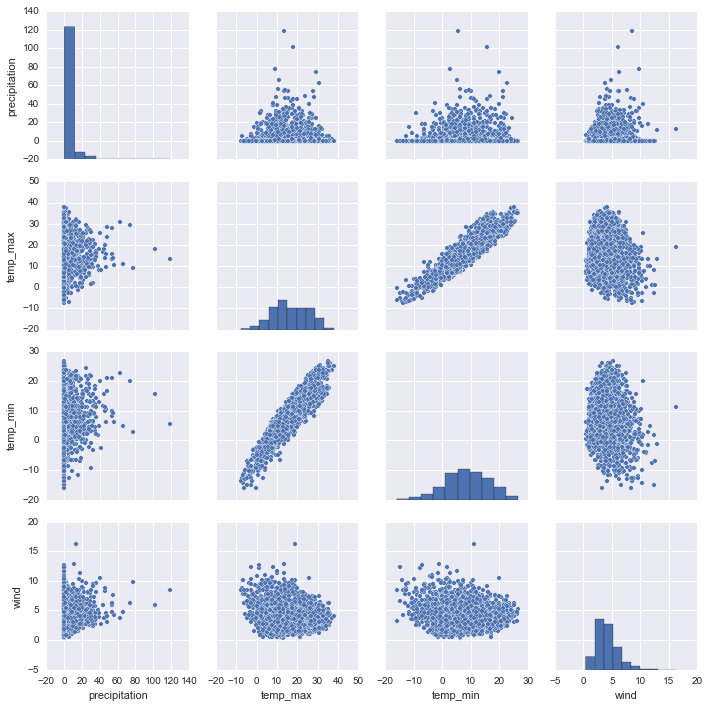

In [2]:
sns.pairplot(weather_df)

# Remember The Univariate Plots in Seaborn?
- Violin, stip, swarm, count, and dist plots
- You can use them for multivariate comparison of distributions
    - You can set both the y and hue to partition your data
- Cannot place them in rows and columns
    - Use them with factor plots

In [3]:
# Try to plot 2 different plots of each (10 plot in total)
# where you set the y and then the hue to see how the 
# plots will behave differently

# Factor Plots
- Use it to further breakdown the distributional plots
- Allows you to place them in rows and columns as well
- Examine [documentation for factor plot](https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot) and attempt to plot 2 different distributional plots in rows or columns for comparison

In [126]:
# Your turn to show off FactorPlot